Introduction to Machine Learning and Analysis (Statistics)

Analyst = Kofi Anane Poku

Linkedin Profile : `linkedin.com/in/kofi-poku-anane`

TABLE OF CONTENT

Link to Download Dataset

Link : https://drive.google.com/file/d/1ovUICggGQ1Ut11pIrTyYwvcxhtv-wh4C/view?usp=drive_link


This is the analysis of Liver Cirrhosis Stage Classification dataset. Logistic regression was applied to determined the probability of factors such as the probability of males with a particuler disease and vice versa. 

This approach will technically help the clinical  sectors in determining how many males or females are likely to get a particular disease.

In [1]:
#Importing librarbies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#importing data into the notebook
liver_analysis = pd.read_csv('liver_cirrhosis.csv')

In [3]:
liver_analysis.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [4]:
# prepare dependent variable
liver_analysis['Sex'] =  np.where(liver_analysis['Sex'] == 'M' , 1 , 0)


In [5]:
liver_analysis.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,0,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,1,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,0,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,0,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,0,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


## Data Cleaning


In [6]:
liver_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  int32  
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [7]:
liver_analysis.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
#checking if there is nall values in the dataset

if liver_analysis.isna().sum().any() > 0:
    print("There are null values in the dataset")
else:    
    print("There are no null values in the dataset")




There are no null values in the dataset


In [9]:
#Checking Duplicated rows in the dataset
duplicated_rows = liver_analysis[liver_analysis.duplicated()].shape[0]
if(duplicated_rows == 0):
    print('There is no duplicated row in the csv file')
else:
    print('There is duplicated rows in the csv file')  

There is duplicated rows in the csv file


In [10]:
#Dropping duplicated rows
liver_analysis.drop_duplicates(keep=False , inplace = True)

In [11]:
#ReChecking if data still got Duplicated rows in it
duplicated_rows = liver_analysis[liver_analysis.duplicated()].shape[0]
if(duplicated_rows == 0):
    print('There is no duplicated row in the csv file')
else:
    print('There is duplicated rows in the csv file') 

There is no duplicated row in the csv file


In [12]:
liver_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6911 entries, 2 to 24992
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6911 non-null   int64  
 1   Status         6911 non-null   object 
 2   Drug           6911 non-null   object 
 3   Age            6911 non-null   int64  
 4   Sex            6911 non-null   int32  
 5   Ascites        6911 non-null   object 
 6   Hepatomegaly   6911 non-null   object 
 7   Spiders        6911 non-null   object 
 8   Edema          6911 non-null   object 
 9   Bilirubin      6911 non-null   float64
 10  Cholesterol    6911 non-null   float64
 11  Albumin        6911 non-null   float64
 12  Copper         6911 non-null   float64
 13  Alk_Phos       6911 non-null   float64
 14  SGOT           6911 non-null   float64
 15  Tryglicerides  6911 non-null   float64
 16  Platelets      6911 non-null   float64
 17  Prothrombin    6911 non-null   float64
 18  Stage       

In [13]:
# Turn object columns into numbers using the pd.Categorical function

liver_object = liver_analysis.select_dtypes(include= 'object')

for key in liver_object.columns:
    liver_analysis[key] = pd.Categorical(liver_object[key]).codes + 1
    
liver_analysis.update(liver_analysis)    

In [14]:
liver_analysis.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
2,4184,1,2,11839,0,1,1,1,1,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,3,2,16467,0,1,1,1,1,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
7,51,3,2,24107,0,2,1,2,3,12.6,200.0,2.74,140.0,918.0,147.25,143.0,150.0,11.1,3
9,1012,3,2,22280,1,2,1,2,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,259.0,10.1,3
10,1149,1,2,11167,1,1,1,1,1,0.8,271.0,3.56,52.0,955.0,130.00,177.0,344.0,10.5,1


In [15]:
#summary statistics
liver_analysis.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,1908.692230,1.829692,1.645782,18400.466358,0.110982,1.348864,1.389669,1.489799,1.197656,3.232644,371.185201,3.498081,97.746304,1976.512414,122.217162,123.853739,252.635713,10.715049,2.038779
std,1093.585692,0.951543,0.478310,3667.571853,0.314133,0.476645,0.487710,0.499932,0.479085,4.546078,194.687362,0.383406,73.936909,1841.565559,47.728024,56.069798,94.329947,0.917581,0.811959
min,41.000000,1.000000,1.000000,9598.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,1.000000,1.000000,15628.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.800000,269.000000,3.290000,51.000000,1029.000000,89.000000,93.000000,188.000000,10.050000,1.000000
50%,1680.000000,1.000000,2.000000,18499.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.300000,369.510563,3.520000,97.648387,1677.000000,122.556346,124.702128,248.000000,10.600000,2.000000
75%,2598.000000,3.000000,2.000000,20819.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,126.000000,306.000000,11.100000,3.000000
max,4795.000000,3.000000,2.000000,28650.000000,1.000000,2.000000,2.000000,2.000000,3.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


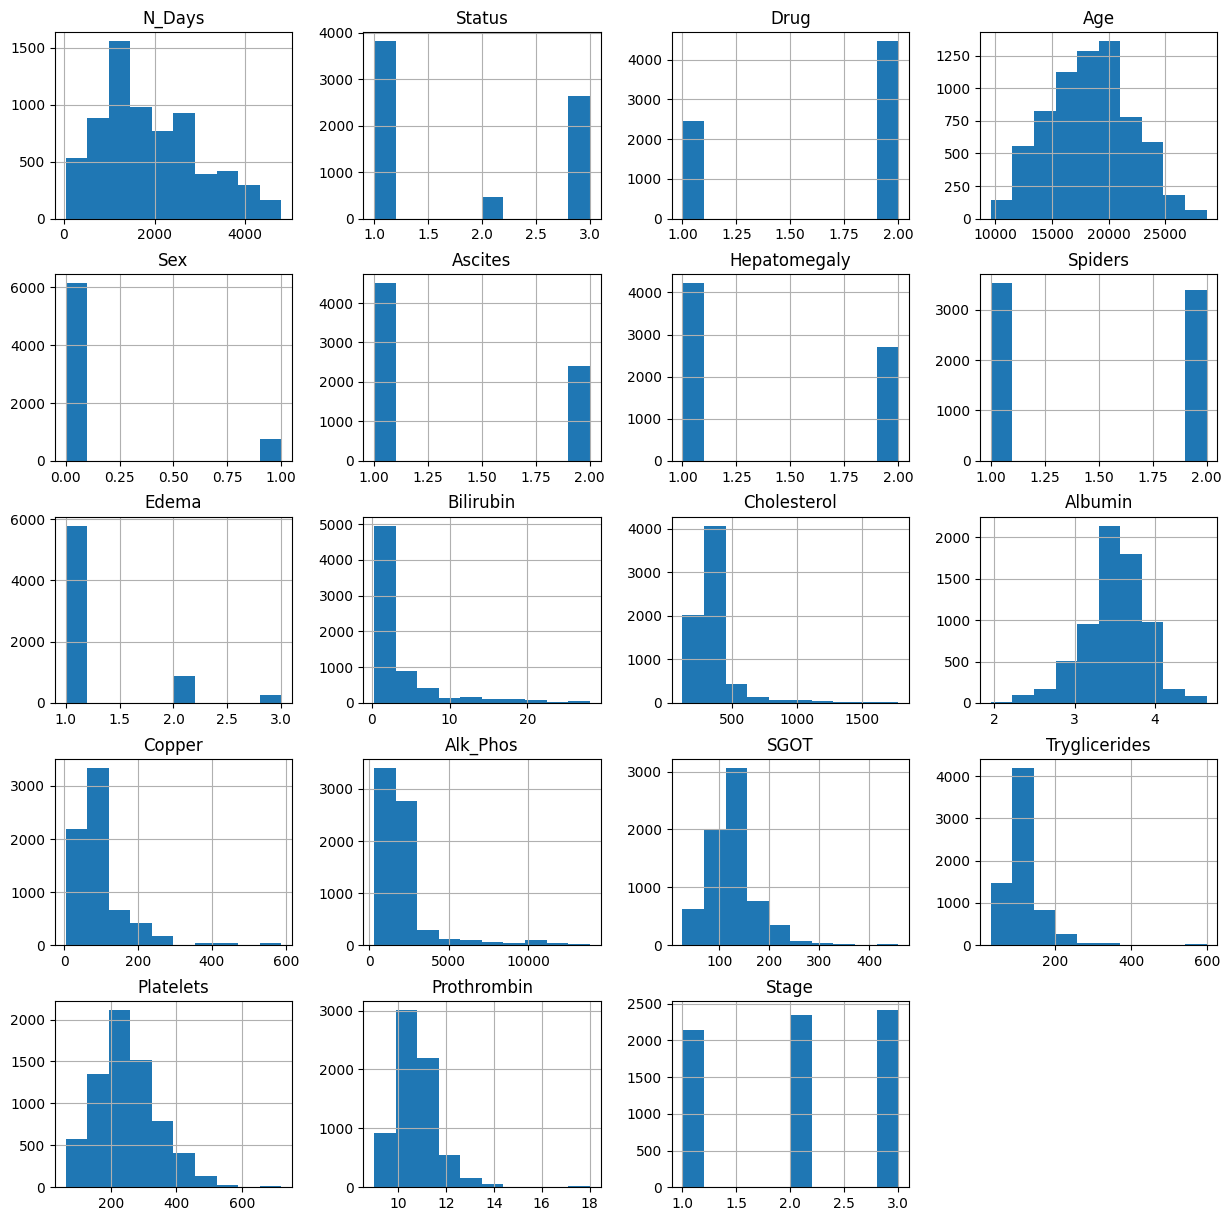

In [16]:
#histograms
liver_analysis.hist(figsize = (15,15));

In [17]:
# removing outliers

print(len(liver_analysis))
liver_analysis = liver_analysis[liver_analysis['Bilirubin'] < 10]
liver_analysis = liver_analysis[liver_analysis['Cholesterol'] < 700]
liver_analysis = liver_analysis[liver_analysis['Copper'] < 250]
liver_analysis = liver_analysis[liver_analysis['Alk_Phos'] < 6500]
liver_analysis = liver_analysis[liver_analysis['SGOT'] < 300]
liver_analysis = liver_analysis[liver_analysis['Tryglicerides'] < 300]
liver_analysis = liver_analysis[liver_analysis['Platelets'] < 557]
liver_analysis = liver_analysis[liver_analysis['Prothrombin'] < 14]

print(len(liver_analysis))

6911
5712


## Logistic Regression Preparation

In [18]:
# prepare dependent variable
#liver_analysis['Sex'] =  np.where(liver_analysis['Sex'] == 'M' , 1 , 0)

In [19]:
# prepare x and y
y = liver_analysis.Sex
x = liver_analysis.drop('Sex' , axis=1)

In [20]:
x = sm.add_constant(x)
x.head(4)

,const,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
2,1.0,4184,1,2,11839,1,1,1,1,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,1.0,2090,3,2,16467,1,1,1,1,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
9,1.0,1012,3,2,22280,2,1,2,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,259.0,10.1,3
10,1.0,1149,1,2,11167,1,1,1,1,0.8,271.0,3.56,52.0,955.0,130.00,177.0,344.0,10.5,1


In [21]:
# Training and Testing Dataset
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split (x , y ,
                                                        test_size = 0.2 ,
                                                        random_state = 1502)

# Logistic Regression 

In [22]:
#Logistic Regression

model = sm.Logit(y_train , x_train).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.321011
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    Sex   No. Observations:                 4569
Model:                          Logit   Df Residuals:                     4550
Method:                           MLE   Df Model:                           18
Date:                Thu, 24 Jul 2025   Pseudo R-squ.:                 0.08135
Time:                        17:21:23   Log-Likelihood:                -1466.7
converged:                       True   LL-Null:                       -1596.6
Covariance Type:            nonrobust   LLR p-value:                 8.347e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.5102      0.986     -6.606      0.000      -8.442      -4.579
N_Days        -7.626

## Interpretation of Result

With the help of prompt engineering, i was able to interpret my logistic regression model

| Variable        | Coefficient | p-value | Interpretation (in relation to being **male**)                                                                                                     |
| --------------- | ----------- | ------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**         | 0.000087    | 0.000   | As **age increases**, the **odds of being male slightly increase**. Though small, it’s statistically significant.                                  |
| **Ascites**     | 0.3922      | 0.018   | Individuals **with ascites** are about **1.48× more likely to be male**.                                   |
| **Spiders**     | -1.4740     | 0.000   | Presence of spiders **greatly reduces the odds of being male** — these individuals are about **77% less likely to be male** . |
| **Albumin**     | 0.4238      | 0.004   | Higher albumin levels **increase the odds of being male**.                                     |
| **Copper**      | 0.0033      | 0.003   | As copper levels increase, **odds of being male increase slightly**.                                                                               |
| **Alk\_Phos**   | 0.0001      | 0.024   | Higher alkaline phosphatase is **weakly associated with being male**, statistically significant.                                                   |
| **SGOT**        | -0.0030     | 0.025   | Higher SGOT levels **slightly reduce the odds of being male**.                                                                                     |
| **Platelets**   | -0.0026     | 0.000   | As platelet count increases, **odds of being male decrease**.                                                                                      |
| **Prothrombin** | 0.2852      | 0.000   | Higher prothrombin time **increases the odds of being male** .                                                  |


### **Plain English Summary**:
In my dataset, being male is more likely among:

Older individuals,

Those with ascites,

Higher albumin, copper, and prothrombin levels.

But males are less likely to present with:

Spiders (possibly a symptom seen more in females),

High SGOT or platelet counts.

This suggests potential gender-based physiological or clinical patterns in my sample — useful for diagnostic profiling or clinical insight.

In [23]:
# Create the function . Writing a function that will read our logistic regression for us 

def logistic_reader(coefficient):
    probability = round((np.exp(coefficient) - 1) * 100 , 2)
    if probability > 0:
        print("The Likelihood increases by", probability ,"%" )
    elif probability == 0:
        print("No Impact")
    else:
        print("The Likelihood decreases by", probability , "%")    


In [24]:
#Apply the function
logistic_reader(-0.0026)

The Likelihood decreases by -0.26 %


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x.shape[1])]

# Display VIF results
print(vif_data)


          Feature         VIF
0           const  417.368837
1          N_Days    1.328204
2          Status    1.327860
3            Drug    1.201255
4             Age    1.072092
5         Ascites    2.348724
6    Hepatomegaly    1.359261
7         Spiders    1.930576
8           Edema    1.174768
9       Bilirubin    1.348114
10    Cholesterol    1.269169
11        Albumin    1.181151
12         Copper    1.256839
13       Alk_Phos    1.139623
14           SGOT    1.245054
15  Tryglicerides    1.179498
16      Platelets    1.124911
17    Prothrombin    1.213423
18          Stage    1.380659


In [32]:
# Interpretation of VIF
def vif_interpretation(vif):
    if vif < 5:
        return "✅ No multicollinearity issue"
    elif 5 <= vif < 10:
        return "⚠️ Moderate multicollinearity, may need attention"
    else:
        return "❌ Strong multicollinearity, variable should be removed or transformed"

# Apply interpretation
vif_data["Interpretation"] = vif_data["VIF"].apply(vif_interpretation)

# Display results
print(vif_data)

          Feature         VIF  \
0           const  417.368837   
1          N_Days    1.328204   
2          Status    1.327860   
3            Drug    1.201255   
4             Age    1.072092   
5         Ascites    2.348724   
6    Hepatomegaly    1.359261   
7         Spiders    1.930576   
8           Edema    1.174768   
9       Bilirubin    1.348114   
10    Cholesterol    1.269169   
11        Albumin    1.181151   
12         Copper    1.256839   
13       Alk_Phos    1.139623   
14           SGOT    1.245054   
15  Tryglicerides    1.179498   
16      Platelets    1.124911   
17    Prothrombin    1.213423   
18          Stage    1.380659   

                                       Interpretation  
0   ❌ Strong multicollinearity, variable should be...  
1                        ✅ No multicollinearity issue  
2                        ✅ No multicollinearity issue  
3                        ✅ No multicollinearity issue  
4                        ✅ No multicollinearity issue  
5  

# Assess the Model 

In [25]:
y_preds = model.predict(x_test)
y_preds = np.where(y_preds > 0.5, 1 , 0)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_test

15956    0
15503    0
18829    0
3658     0
22865    0
        ..
6152     0
9307     0
22323    1
17565    1
2761     0
Name: Sex, Length: 1143, dtype: int32

In [27]:
# Check if the datatset is balanced 
# Anything below 0.3 is unbalanced datatset
y_test.mean()

0.10586176727909011

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test , y_preds))

tn, fp, fn, tp = confusion_matrix(y_test , y_preds).ravel()

[[1020    2]
 [ 120    1]]


In [29]:
fn

120